In [18]:
from functools import partial
import jax
from jax import vmap
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
seed = 42
rng = jax.random.PRNGKey(seed)
i_size = 7
c_size = 10
input_range = 1
size_distract = 0
w_scale = 1

In [3]:
rng, new_rng, new_rng2, new_rng3, new_rng4 = jax.random.split(rng, 5)
w = jax.random.normal(rng, shape=[i_size])*w_scale

x = jax.random.uniform(new_rng, shape=[c_size, i_size],
                     minval=-input_range/2, maxval=input_range/2)
y_data = jnp.squeeze(x@w)

In [4]:
x.shape, y_data.shape

((10, 7), (10,))

In [5]:
seq = jnp.concatenate([x, y_data[..., None]], -1)

In [6]:
x_querry = jax.random.uniform(new_rng2, shape=[1, i_size],
                            minval=-input_range/2, maxval=input_range/2)
y_target = x_querry@w
y_target = y_target[..., None]

In [7]:
x_querry.shape, y_target.shape

((1, 7), (1, 1))

In [8]:
target = jnp.concatenate([x_querry, y_target], -1)

In [9]:
seq.shape, target.shape

((10, 8), (1, 8))

In [10]:
# choice = jax.random.choice(new_rng4, c_size, shape=[size_distract],
#                          replace=False)
# y_data = y_data.at[choice].set(jax.random.normal(new_rng3, 
#                                                shape=[size_distract]))

x_querry_init = -1*x_querry.dot(jnp.ones_like(x_querry).T*0.0)
zero = jnp.concatenate([x_querry, x_querry_init], -1)
seq = jnp.concatenate([seq, zero], 0)

In [11]:
seq.shape

(11, 8)

In [12]:
target.shape

(1, 8)

In [13]:
w.shape, x.shape, y_data.shape

((7,), (10, 7), (10,))

In [15]:
x_querry.shape, x_querry_init.shape

((1, 7), (1, 1))

In [16]:
zero.shape

(1, 8)

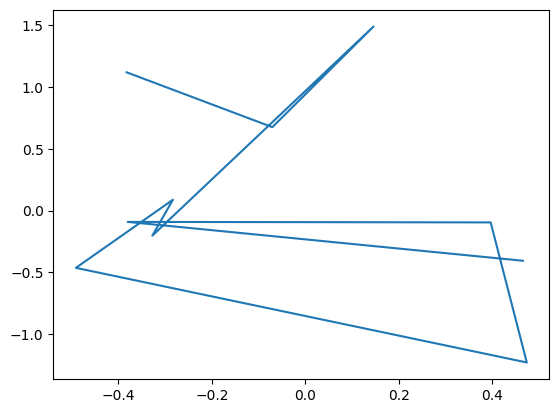

In [20]:
fig, ax = plt.subplots()
ax.plot(x[:,-1], y_data)

In [21]:
x, y_data

(Array([[ 0.38048196,  0.28961992, -0.22773707,  0.4433223 ,  0.05282438,
          0.27519953, -0.38222003],
        [ 0.28728163, -0.20863128, -0.47975814, -0.38236248,  0.3348118 ,
          0.0270443 , -0.07074726],
        [ 0.4622537 ,  0.49017644, -0.02608097, -0.14597726,  0.39065886,
          0.29648352,  0.14573622],
        [-0.4173447 , -0.14806509, -0.01140726, -0.41437697,  0.36718404,
          0.15657306, -0.3273102 ],
        [ 0.23100305, -0.20175207,  0.2179848 ,  0.04002476,  0.37828565,
         -0.23442113, -0.28332734],
        [ 0.14742553, -0.3638823 , -0.14286613,  0.24507141, -0.31591296,
         -0.46690083, -0.490839  ],
        [-0.43726504, -0.3248917 ,  0.47242737, -0.45384204,  0.03951049,
         -0.0965333 ,  0.47337914],
        [ 0.21890032, -0.22464716, -0.12466383, -0.07109475, -0.17940319,
          0.01415694,  0.3961289 ],
        [ 0.45505273, -0.49561226, -0.08005333, -0.15837622, -0.38871276,
         -0.27039635, -0.38003767],
        [-